Do pair-wise comprision among gpt3.5, gpt4 turbo, gpt 4o.
Using z-test for proportions. Set significance level 0.05.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Contingency table : 
|  | GPT 3.5 Turbo  | GPT 4 Turbo | GPT 4o |
|------|-----|-----|-----|
| Aligned With Nurses |  318  |  373  |  394  |
| Different With Nurses   |  127  |  72  |  51  |
| Column Total   |  445  |  445  |  445 |

In [2]:
# according to collected data, the performance of GPT-3.5, GPT-4 turbo and GPT-40 are as follows
GPT35_performance = np.array([318,127]) # aligned counts and none-aligned counts
GPT4turbo_performance = np.array([373,72])
GPT4o_performance = np.array([394,51])

alpha = 0.05 # significance level

In [3]:
def ztest_for_propotion(X1, X2, n1, n2):
    p1 = X1 / n1
    p2 = X2 / n2
    p = (X1 + X2) / (n1 + n2)
    se = np.sqrt(p * (1 - p) * (1 / n1 + 1 / n2))
    z_score = (p1 - p2) / se
    p_value = 2 * (1 - norm.cdf(np.abs(z_score)))
    return z_score, p_value

def hypothesis_test_result(p_value, alpha):
    if p_value < alpha:
        return "reject the null hypothesis: the difference is statistically significant."
    else:
        return "fail to reject the null hypothesis: the difference is not statistically significant."

Get z value and p value for each pair.

In [4]:
z_gpt35_vs_gpt4turbo, p_gpt35_vs_gpt4turbo = ztest_for_propotion(GPT35_performance[0], GPT4turbo_performance[0], np.sum(GPT35_performance), np.sum(GPT4turbo_performance))
z_gpt35_vs_gpt4o, p_gpt35_vs_gpt4o = ztest_for_propotion(GPT35_performance[0], GPT4o_performance[0], np.sum(GPT35_performance), np.sum(GPT4o_performance))
z_gpt4turbo_vs_gpt4o, p_gpt4turbo_vs_gpt4o = ztest_for_propotion(GPT4turbo_performance[0], GPT4o_performance[0], np.sum(GPT4turbo_performance), np.sum(GPT4o_performance))

In [5]:
print('GPT-3.5 vs GPT-4 turbo:')
print('z:', z_gpt35_vs_gpt4turbo)
print('p:', p_gpt35_vs_gpt4turbo)
print(hypothesis_test_result(p_gpt35_vs_gpt4turbo, alpha))

GPT-3.5 vs GPT-4 turbo:
z: -4.42478456920572
p: 9.653857209857009e-06
reject the null hypothesis: the difference is statistically significant.


In [6]:
print('GPT-3.5 vs GPT-4o:')
print('z:', z_gpt35_vs_gpt4o)
print('p:', p_gpt35_vs_gpt4o)
print(hypothesis_test_result(p_gpt35_vs_gpt4o, alpha))

GPT-3.5 vs GPT-4o:
z: -6.368814469962913
p: 1.9049495314504838e-10
reject the null hypothesis: the difference is statistically significant.


In [7]:
print('GPT-4 turbo vs GPT-4o:')
print('z:', z_gpt4turbo_vs_gpt4o)
print('p:', p_gpt4turbo_vs_gpt4o)
print(hypothesis_test_result(p_gpt4turbo_vs_gpt4o, alpha))

GPT-4 turbo vs GPT-4o:
z: -2.0396895006677886
p: 0.04138126131616815
reject the null hypothesis: the difference is statistically significant.


Plot the result.

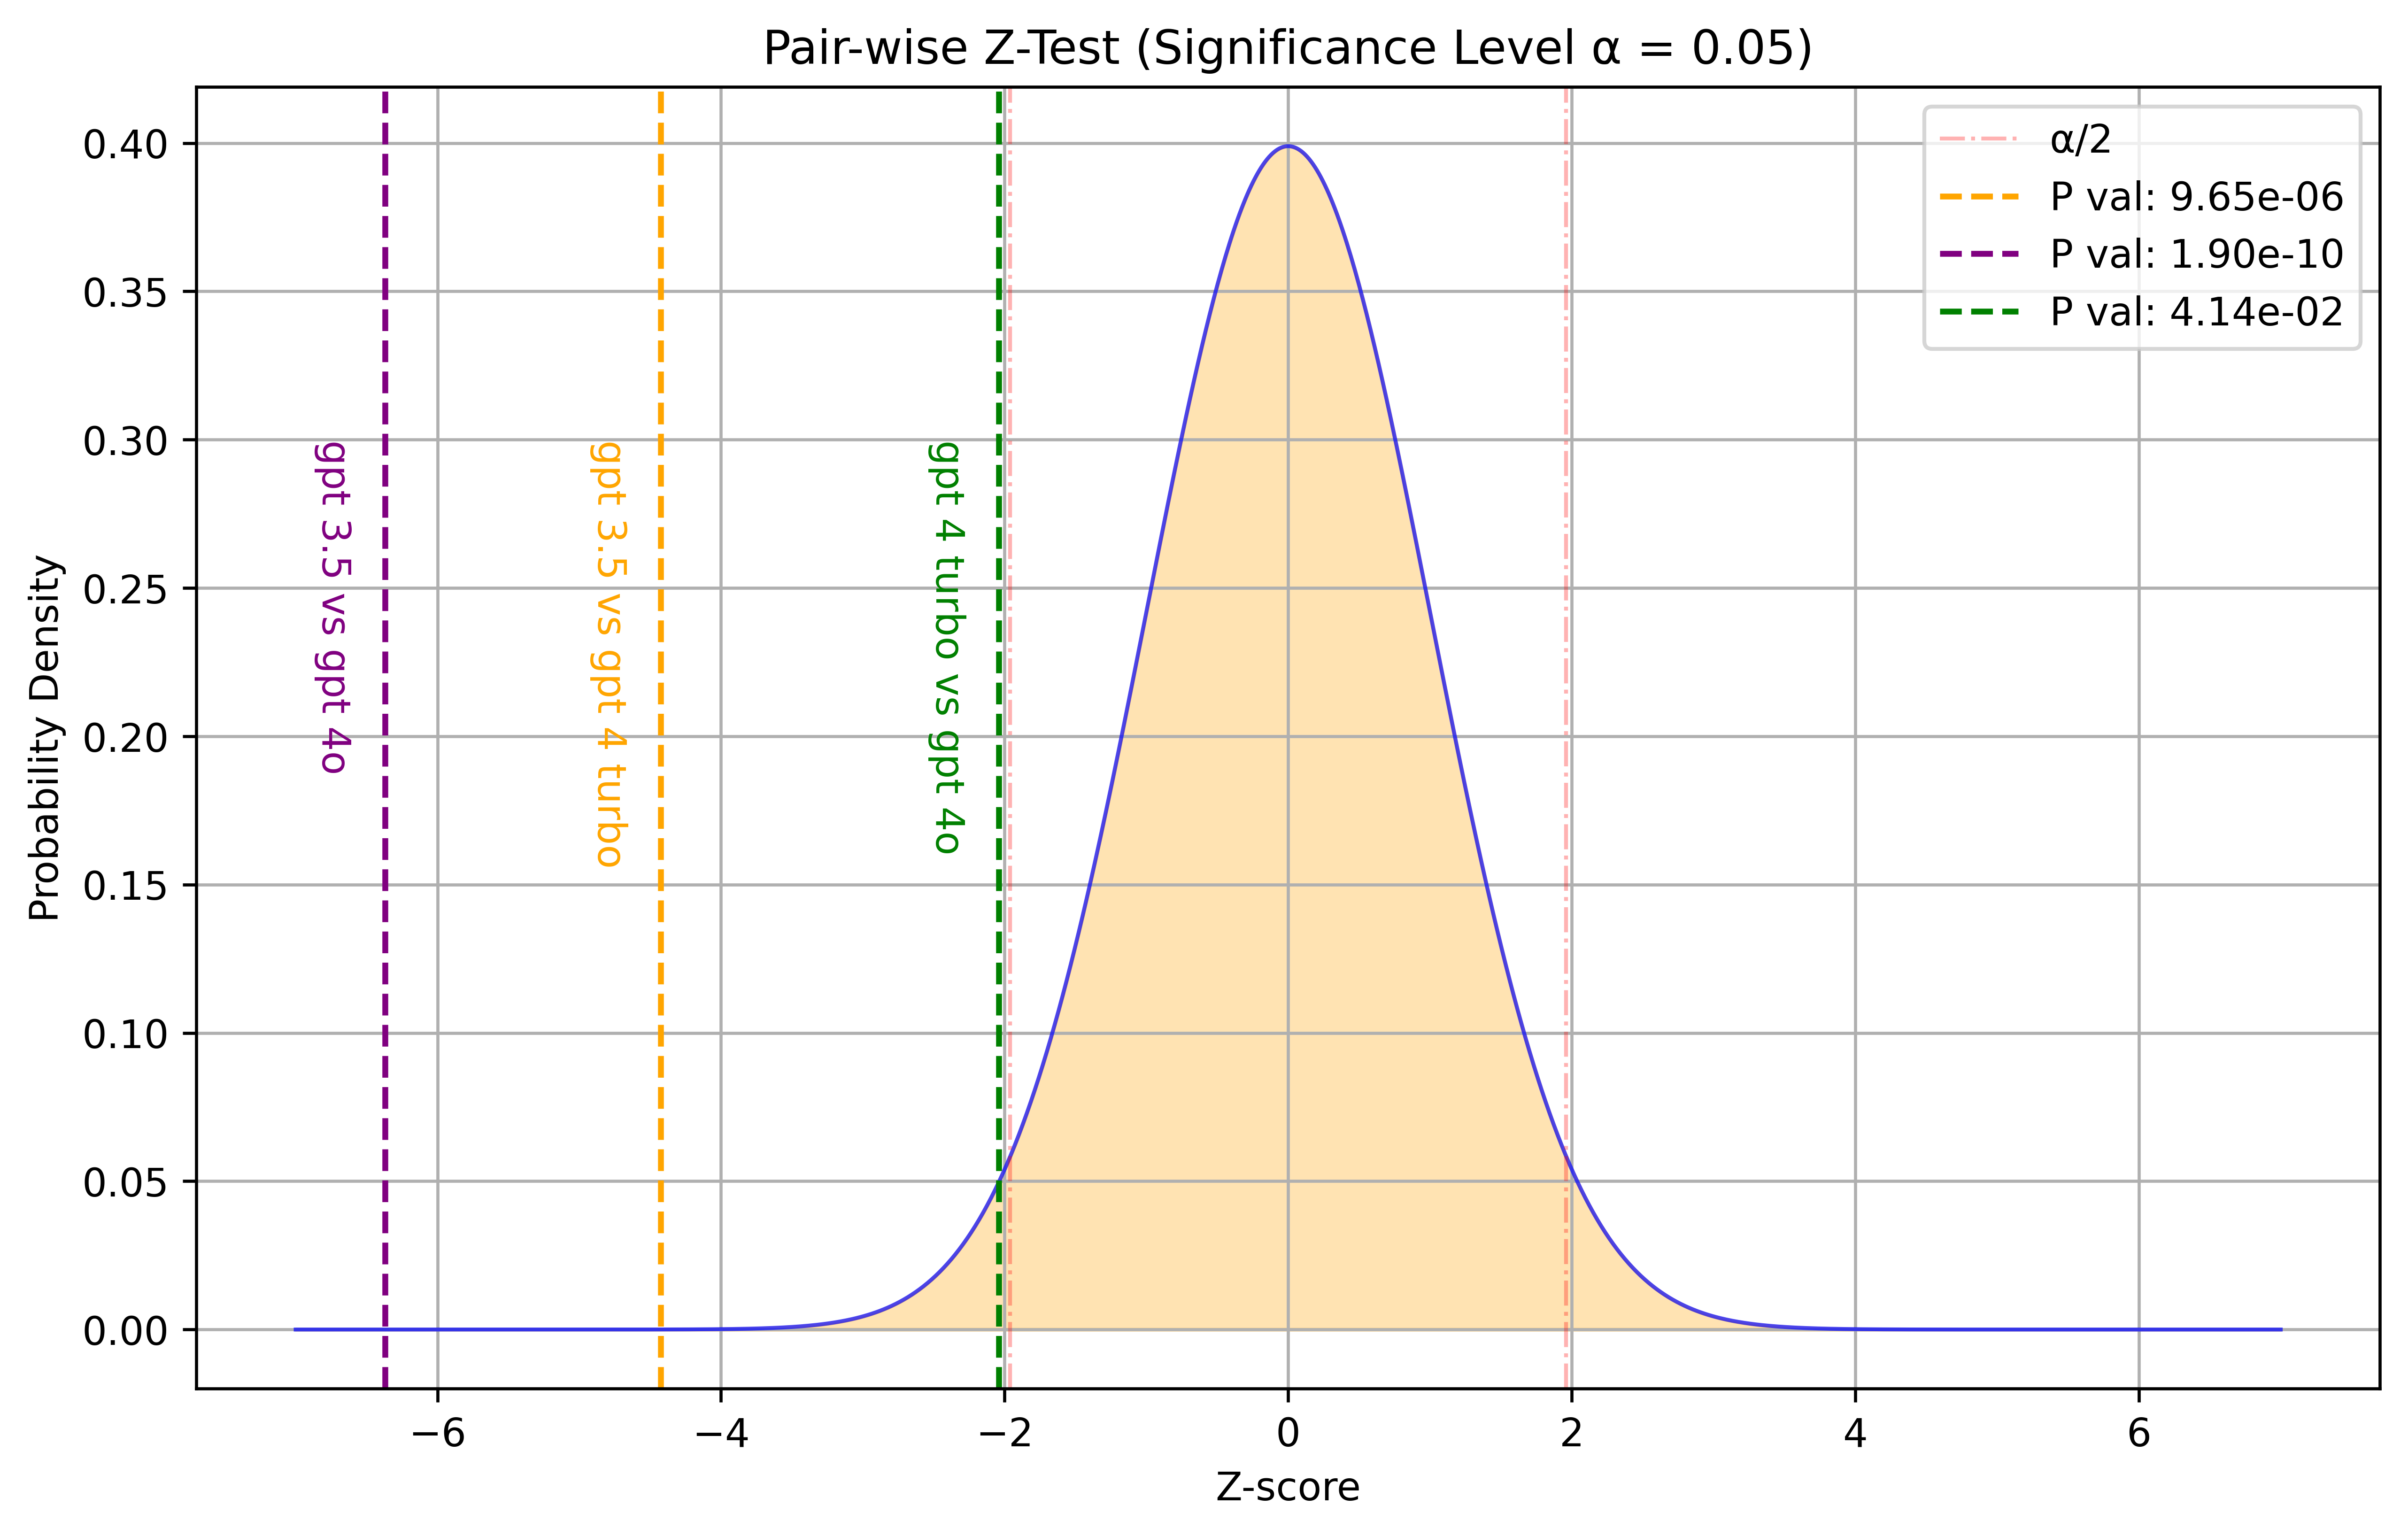

In [9]:
# Create a range of Z values
z_values = np.linspace(-7, 7, 1000)

# Calculate the probability density function (PDF) for the normal distribution
pdf = norm.pdf(z_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(z_values, pdf, color='blue', alpha=0.7, linewidth=1) # alpha is the transparency level
plt.fill_between(z_values, pdf, where=(z_values >= -7), color='orange',alpha=0.3) #alpha is the transparency level

#significant level
z_value_significant = norm.ppf(1-alpha/2)
plt.axvline(z_value_significant, color='red', linestyle='-.', label='α/2', alpha=0.3, linewidth=1)
plt.axvline(-z_value_significant, color='red', linestyle='-.', alpha=0.3, linewidth=1)

# Add vertical line for the Z-score
plt.axvline(z_gpt35_vs_gpt4turbo, color='orange', linestyle='--', label=f'P val: {p_gpt35_vs_gpt4turbo:.2e}')
# put the label next to the line
plt.text(z_gpt35_vs_gpt4turbo-0.5, 0.3, f'gpt 3.5 vs gpt 4 turbo', rotation=270, verticalalignment='top', color='orange')

plt.axvline(z_gpt35_vs_gpt4o, color='purple', linestyle='--', label=f'P val: {p_gpt35_vs_gpt4o:.2e}')
plt.text(z_gpt35_vs_gpt4o-0.5, 0.3, f'gpt 3.5 vs gpt 4o', rotation=270, verticalalignment='top', color='purple')

plt.axvline(z_gpt4turbo_vs_gpt4o, color='green', linestyle='--', label=f'P val: {p_gpt4turbo_vs_gpt4o:.2e}')
plt.text(z_gpt4turbo_vs_gpt4o-0.5, 0.3, f'gpt 4 turbo vs gpt 4o', rotation=270, verticalalignment='top', color='green')

# Add labels and title
plt.title(f'Pair-wise Z-Test (Significance Level α = {alpha})')
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()

# change the dpi of the figure
plt.rcParams['figure.dpi'] = 600
# change the size of the figure : 7.24 × 6.28 inches
plt.rcParams['figure.figsize'] = [7.24, 6.28]
# Show the plot
plt.show()